Visualizing my step data, from a Garmin [vívofit](https://buy.garmin.com/en-US/US/p/143405) (until about May 2016) and [Forerunner 235](https://buy.garmin.com/en-US/US/p/529988) (since about then).
The data has been recorded to the [Apples Health](https://www.apple.com/ios/health/) app by [Garmin Connect](https://connect.garmin.com/).
I exported the data from Apple Health to a [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) file with the [QS Access](http://quantifiedself.com/qs-access-app/) app.

In [50]:
# Load some modules we need
import pandas  # for data manipulation
import matplotlib.pylab as plt  # for plotting
%matplotlib inline
import seaborn  # for plot styling
import dateutil.relativedelta  # for date calculations
import calendar  # for easy day and month names in the tick labels

In [51]:
# Set some defaults
seaborn.set_style('dark')
plt.rcParams['figure.figsize'] = (16, 9)  # Size up figures a bit

In [52]:
# Read in data
data=pandas.read_csv('steps.csv')

In [53]:
# How does it look like?
data.head()

,Start,Finish,Steps (count)
0,13-Sep-2014 00:00,14-Sep-2014 00:00,13132.0
1,14-Sep-2014 00:00,15-Sep-2014 00:00,23778.0
2,15-Sep-2014 00:00,16-Sep-2014 00:00,9459.0
3,16-Sep-2014 00:00,17-Sep-2014 00:00,12109.0
4,17-Sep-2014 00:00,18-Sep-2014 00:00,11904.0


In [54]:
# Massage data
data.rename(columns={'Start':'Date'}, inplace=True)
data.rename(columns={'Steps (count)':'Steps'}, inplace=True)
data.rename(columns={'Steps (count)':'Steps'}, inplace=True)
data.Steps = data.Steps.astype(int)
data.drop('Finish', axis=1, inplace=True)

In [55]:
# Make us a proper date column, based on https://stackoverflow.com/a/26763793
data['Date'] = pandas.to_datetime(data['Date'])

In [56]:
# Make us a year, month and weekday colum, based on https://stackoverflow.com/q/48623332
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Weekday'] = data.Date.dt.dayofweek

In [57]:
# Show a small sample of the data
data.sample(n=5)

,Date,Steps,Year,Month,Weekday
1385,2018-06-29,10796,2018,6,4
496,2016-01-22,14834,2016,1,4
328,2015-08-07,12364,2015,8,4
701,2016-08-14,13061,2016,8,6
1330,2018-05-05,13864,2018,5,5


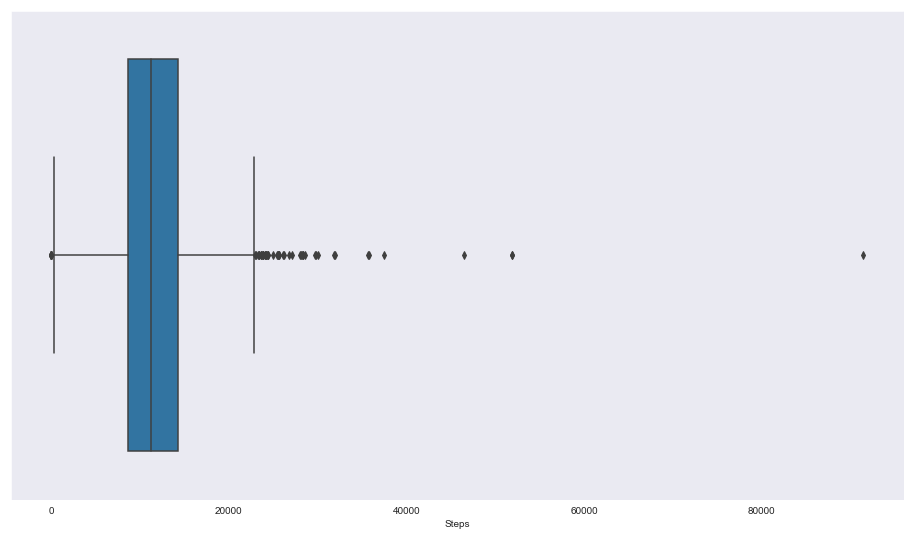

In [58]:
# Let's see all the data
seaborn.boxplot(data.Steps)
plt.show()

In [59]:
# When were the five highest step counts?
data.sort_values('Steps', ascending=False).head()

,Date,Steps,Year,Month,Weekday
483,2016-01-09,91370,2016,1,5
475,2016-01-01,51830,2016,1,4
397,2015-10-15,51814,2015,10,3
350,2015-08-29,46450,2015,8,5
448,2015-12-05,37426,2015,12,5


Looking into my calendar this was when:

- we moved from one to place to another
- ?
- https://www.dropbox.com/preview/Apps/tapiriik/2015/06/2015.06.20._Hiking.tcx?role=personal
- ?
- ?

In [60]:
# When were the five lowest step counts?
data.sort_values('Steps').head()

,Date,Steps,Year,Month,Weekday
1576,2019-01-06,0,2019,1,6
25,2014-10-08,0,2014,10,2
1575,2019-01-05,0,2019,1,5
30,2014-10-13,0,2014,10,0
457,2015-12-14,0,2015,12,0


In [61]:
# Drop all the step counts above 400000, I think they mus be outliers.
# https://stackoverflow.com/a/27360130
data.drop(data[data.Steps > 40000].index, inplace=True)

In [62]:
# Drop all the step counts below 1000.
# https://stackoverflow.com/a/27360130
data.drop(data[data.Steps < 1000].index, inplace=True)

In [63]:
# Generate us a nice plot title, with help from https://stackoverflow.com/a/32083946/323100
Duration = dateutil.relativedelta.relativedelta(data.Date.max(), data.Date.min())

In [64]:
# Generate us some nice tick labels
Ticklabels_weekday = ['%s\n~%g steps' % (d, round(s / 1e3, 1) * 1e3)
                      for (s, d) in zip(data.groupby(data.Weekday).Steps.mean(),
                                        list(calendar.day_name))]
# Generate us some nice tick labels
Ticklabels_month = ['%s\n~%g steps' % (m, round(s / 1e3, 1) * 1e3)
                    for (s, m) in zip(data.groupby(data.Month).Steps.mean(),
                                      list(calendar.month_name[1:]))]
# Generate us some nice tick labels
Ticklabels_year = ['%s\n~%g steps' % (y, round(s / 1e3, 1) * 1e3)
                   for (s, y) in zip(data.groupby(data.Year).Steps.mean(),
                                     data.Year.unique())]

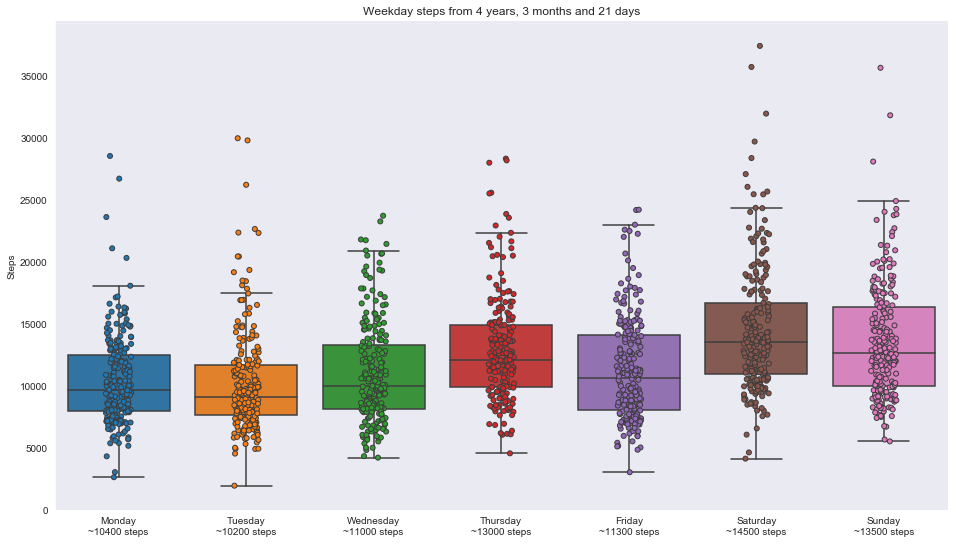

In [65]:
# Plot the steps per weekday
seaborn.boxplot(data=data, x=data.Weekday, y=data.Steps, fliersize=0)
#seaborn.violinplot(data=data, x=data.Weekday, y=data.Steps, cut=0, inner=None)
seaborn.stripplot(data=data, x=data.Weekday, y=data.Steps, jitter=True, linewidth=1)
plt.gca().set_xticklabels(Ticklabels_weekday)
plt.title('Weekday steps from %s years, %s months and %s days' % (Duration.years,
                                                                  Duration.months,
                                                                  Duration.days))
plt.gca().xaxis.label.set_visible(False)
seaborn.despine()
plt.show()

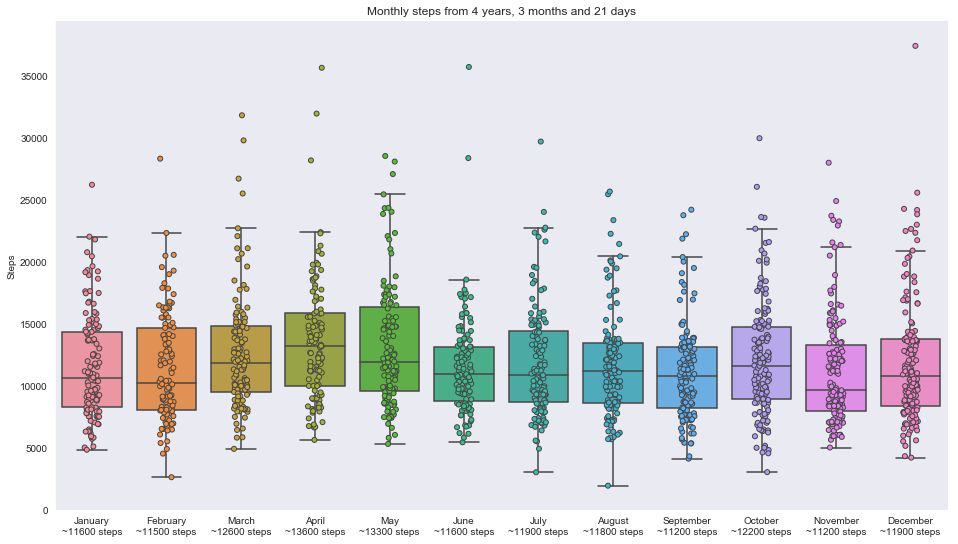

In [66]:
# Plot the steps per month
seaborn.boxplot(data=data, x=data.Month, y=data.Steps, fliersize=0)
#seaborn.violinplot(data=data, x=data.Month, y=data.Steps, cut=0, inner=None)
seaborn.stripplot(data=data, x=data.Month, y=data.Steps, jitter=True, linewidth=1)
plt.gca().set_xticklabels(Ticklabels_month)
plt.title('Monthly steps from %s years, %s months and %s days' % (Duration.years,
                                                                  Duration.months,
                                                                  Duration.days))
plt.gca().xaxis.label.set_visible(False)
seaborn.despine()
plt.show()

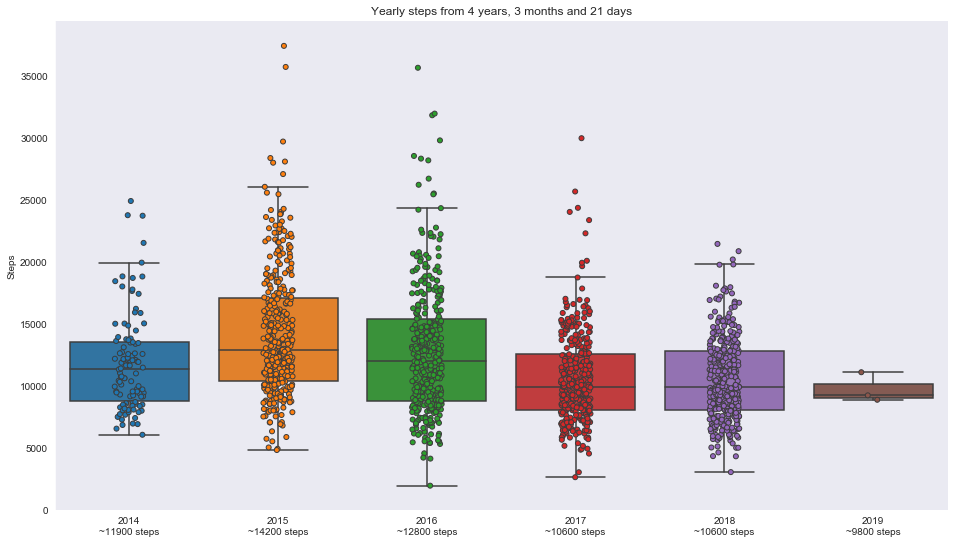

In [67]:
# Plot the steps per month
seaborn.boxplot(data=data, x=data.Year, y=data.Steps, fliersize=0)
#seaborn.violinplot(data=data, x=data.Year, y=data.Steps, cut=0, inner=None)
seaborn.stripplot(data=data, x=data.Year, y=data.Steps, jitter=True, linewidth=1)
plt.gca().set_xticklabels(Ticklabels_year)
plt.title('Yearly steps from %s years, %s months and %s days' % (Duration.years,
                                                                 Duration.months,
                                                                 Duration.days))
plt.gca().xaxis.label.set_visible(False)
seaborn.despine()
plt.show()